## Perfomance~ 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from functools import partial
from collections import namedtuple
from itertools import chain

# 작업의 시작 및 종료 시간을 포함하는 이벤트를 나타내는 namedtuple
Event = namedtuple('Event', 'job start end')

# 작업 실행 비용 함수
def compcost(job, agent):
    return exec_times_gpu[job][agent]

    
# 통신 비용 함수
def commcost(ni, nj, agent_from, agent_to):
    if agent_from == agent_to:
        return 0
    else:
        if(ni=='Embed' and nj=='layer0'):
            return 5
        if(ni=='layer0' and nj=='layer1'):
            return 100000 # 106500
        if(ni=='layer1' and nj=='layer2'):
            return 100000 # 106500
        if(ni=='layer2' and nj=='layer3'):
            return 100000 # 106500
        if(ni=='layer3' and nj=='layer4'):
            return 100000 # 106500
        if(ni=='layer4' and nj=='layer5'):
            return 100000 # 106500
        if(ni=='layer5' and nj=='layer6'):
            return 100000 # 106500
        if(ni=='layer6' and nj=='layer7'):
            return 100000 # 106500
        if(ni=='layer7' and nj=='layer8'):
            return 100000 # 106500
        if(ni=='layer8' and nj=='layer9'):
            return 100000 # 106500
        if(ni=='layer9' and nj=='layer10'):
            return 100000 # 106500
        if(ni=='layer10' and nj=='layer11'):
            return 100000 # 106500
        if(ni=='layer11' and nj=='layer12'):
            return 100000 # 106500
        if(ni=='layer12' and nj=='layer13'):
            return 100000 # 106500
        if(ni=='layer13' and nj=='layer14'):
            return 100000 # 106500
        if(ni=='layer14' and nj=='layer15'):
            return 100000 # 106500
        if(ni=='layer15' and nj=='layer16'):
            return 100000 # 106500
        if(ni=='layer16' and nj=='layer17'):
            return 100000 # 106500
        if(ni=='layer17' and nj=='layer18'):
            return 100000 # 106500
        if(ni=='layer18' and nj=='layer19'):
            return 100000 # 106500
        if(ni=='layer19' and nj=='layer20'):
            return 100000 # 106500
        if(ni=='layer20' and nj=='layer21'):
            return 100000 # 106500
        if(ni=='layer21' and nj=='layer22'):
            return 100000 # 106500
        if(ni=='layer22' and nj=='layer23'):
            return 100000 # 106500
        if(ni=='layer23' and nj=='layer24'):
            return 100000 # 106500
        if(ni=='layer24' and nj=='layer25'):
            return 100000 # 106500
        if(ni=='layer25' and nj=='layer26'):
            return 100000 # 106500
        if(ni=='layer26' and nj=='layer27'):
            return 100000 # 106500
        if(ni=='layer27' and nj=='layer28'):
            return 100000 # 106500
        if(ni=='layer28' and nj=='layer29'):
            return 100000 # 106500
        if(ni=='layer29' and nj=='layer30'):
            return 100000 # 106500
        if(ni=='layer30' and nj=='layer31'):
            return 100000 # 106500
        if(ni=='layer31' and nj=='norm'):
            return 100000 # 106500
        if(ni=='Norm' and nj=='lm_head'):
            return 10
        else:
            return 0

# DAG (작업 그래프) 정의
dag = {'Embed': ['layer0']}
for i in range(31):
    dag[f'layer{i}'] = [f'layer{i+1}']
dag['layer31'] = ['Norm']
dag['Norm'] = ['lm_head']
    

# 각 GPU마다 존재하는 실행 시간 상대적인 값
exec_times_gpu = {
    'Embed': [5, 10, 10],
    'Norm': [10, 20, 20],
    'lm_head': [250000, 500000, 500000],
}

for i in range(32):
    exec_times_gpu[f'layer{i}'] = [100000, 500000, 500000]



In [2]:
# 평균 실행 시간 계산 함수 (소숫점 첫째 자리까지 반올림)
def calculate_avg_exec_times(exec_times_gpu):
    avg_exec_times = {}
    for node, times in exec_times_gpu.items():
        avg_exec_times[node] = round(sum(times) / len(times), 1)  # 소숫점 첫째 자리까지 반올림
        #print(avg_exec_times[node])
    return avg_exec_times

avg_exec_times = calculate_avg_exec_times(exec_times_gpu)

# Upward Rank 계산 함수
def calculate_ranku(dag, exec_times):
    rank = {}
    def ranku(node):
        if node in rank:
            return rank[node]
        if node not in dag or not dag[node]:
            rank[node] = exec_times[node]
        else:
            rank[node] = exec_times[node] + max(commcost(succ, node, 0, 1) + ranku(succ) for succ in dag[node])
        return rank[node]
    for node in dag:
        ranku(node)
    return rank

# 우선순위 계산
ranks = calculate_ranku(dag, avg_exec_times)

# 우선순위 출력
print("우선순위 (Upward Rank):")
for node, rank_value in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {rank_value}")


우선순위 (Upward Rank):
Embed: 12150026.099999996
layer0: 12150017.799999995
layer1: 11783351.099999996
layer2: 11416684.399999997
layer3: 11050017.699999997
layer4: 10683350.999999998
layer5: 10316684.299999999
layer6: 9950017.6
layer7: 9583350.9
layer8: 9216684.200000001
layer9: 8850017.500000002
layer10: 8483350.800000003
layer11: 8116684.100000002
layer12: 7750017.400000002
layer13: 7383350.700000002
layer14: 7016684.000000002
layer15: 6650017.300000002
layer16: 6283350.6000000015
layer17: 5916683.900000001
layer18: 5550017.200000001
layer19: 5183350.500000001
layer20: 4816683.800000001
layer21: 4450017.100000001
layer22: 4083350.400000001
layer23: 3716683.7000000007
layer24: 3350017.0000000005
layer25: 2983350.3000000003
layer26: 2616683.6
layer27: 2250016.9
layer28: 1883350.2
layer29: 1516683.5
layer30: 1150016.8
layer31: 783350.1000000001
Norm: 416683.4
lm_head: 416666.7


In [3]:
def schedule_tasks(dag, exec_times_gpu, num_agents):
    """
    작업을 각 에이전트에 효율적으로 스케줄링하는 함수

    Args:
        dag (dict): 작업 간의 의존성을 나타내는 DAG
        exec_times_gpu (dict): 각 작업이 각 에이전트에서 실행되는 시간
        num_agents (int): 사용 가능한 에이전트의 수

    Returns:
        dict: 각 에이전트에 스케줄링된 작업들의 목록
    """
    
    # 1. 각 작업의 우선순위를 계산
    avg_exec_times = calculate_avg_exec_times(exec_times_gpu)
    rank = calculate_ranku(dag, avg_exec_times)
    
    # 2. 우선순위에 따라 작업을 내림차순으로 정렬
    sorted_tasks = sorted(rank, key=rank.get, reverse=True)
    #print("Sorted tasks based on priority:", sorted_tasks)

    # 3. 각 에이전트별로 스케줄을 초기화
    schedules = {agent: [] for agent in range(num_agents)}
    
    # 4. 각 에이전트의 다음 사용 가능 시간을 0으로 초기화
    agent_available_time = {agent: 0 for agent in range(num_agents)}
    
    # 5. 각 작업이 어느 에이전트에서 언제 완료되었는지를 추적하는 딕셔너리 초기화
    task_assignment = {}
    
    # 6. 각 작업의 선행 작업을 찾기 위한 역방향 DAG 생성
    reverse_dag = {task: [] for task in dag}
    for task, successors in dag.items():
        for succ in successors:
            if succ not in reverse_dag:
                reverse_dag[succ] = []
            reverse_dag[succ].append(task)

    # 7. 우선순위가 높은 작업부터 순차적으로 스케줄링
    for task in sorted_tasks:
        #print(f"\nScheduling task: {task}")
        earliest_start_time = float('inf')  # 현재 작업의 가장 이른 시작 시간을 무한대로 초기화
        best_agent = None  # 현재 작업을 가장 빨리 실행할 수 있는 에이전트를 저장할 변수

        # 선행 작업들을 확인 
        successors = reverse_dag.get(task, [])
        #print(f"Task {task} successors: {successors}")
        
        # 모든 에이전트를 순회하며 가장 효율적인 에이전트를 찾음
        for agent in range(num_agents):
            succ_times = []
            # 후속 작업들에 대한 통신 비용을 모두 고려함
            for succ in successors:
                succ_agent, succ_finish_time = task_assignment.get(succ, (None, 0))
                
                # 후속 작업이 스케줄링되지 않았으면, 현재 작업의 통신 비용 고려
                if succ_agent is None:
                    continue

                # 만약 후속 작업이 다른 에이전트에서 실행되었다면 통신 비용 적용
                comm_time = commcost(task, succ, agent, succ_agent) if succ_agent != agent else 0
                #print(f"Comm time between task {task} on agent {agent} and task {succ} on agent {succ_agent}: {comm_time}")
                succ_times.append(succ_finish_time + comm_time)

            # 후속 작업이 있는 경우만 시작 시간을 계산
            if succ_times:
                start_time = max(
                    agent_available_time[agent],  # 해당 에이전트가 사용 가능해지는 시간
                    max(succ_times, default=0)  # 후속 작업의 완료 시간 + 통신 시간 중 가장 늦은 값
                )
            else:
                start_time = agent_available_time[agent]  # 후속 작업이 없을 경우 바로 시작 가능

            #print(f"Start time for task {task} on agent {agent}: {start_time}")
            
            # 해당 에이전트에서 작업을 완료하는 시간 계산
            finish_time = start_time + exec_times_gpu[task][agent]
            #print(f"Finish time for task {task} on agent {agent}: {finish_time}")
            
            # 가장 빠른 완료 시간을 가진 에이전트와 시간을 저장
            if finish_time < earliest_start_time:
                earliest_start_time = finish_time
                best_agent = agent
                #print(f"Best agent updated to {best_agent} with earliest finish time {earliest_start_time}")
        
        # 선택된 에이전트의 스케줄에 현재 작업 추가
        schedules[best_agent].append((task, agent_available_time[best_agent], earliest_start_time))
        #print(f"Task {task} scheduled on agent {best_agent} from {agent_available_time[best_agent]} to {earliest_start_time}")
        
        # 해당 에이전트의 다음 사용 가능 시간을 업데이트
        agent_available_time[best_agent] = earliest_start_time
        #print(f"Agent {best_agent} available at {agent_available_time[best_agent]}")
        
        # 현재 작업의 에이전트 할당 및 완료 시간을 저장
        task_assignment[task] = (best_agent, earliest_start_time)
    
    return schedules


In [4]:
# 예시 실행
if __name__ == "__main__":
    num_agents = 3
    schedules = schedule_tasks(dag, exec_times_gpu, num_agents)  
    
    print("Scheduled Tasks:")
    for agent, tasks in schedules.items():
        print(f"GPU{agent}:")
        for task, start, end in tasks:
            print(f"  Task {task} from {start} to {end}")

Scheduled Tasks:
GPU0:
  Task Embed from 0 to 5
  Task layer0 from 5 to 100005
  Task layer1 from 100005 to 200005
  Task layer2 from 200005 to 300005
  Task layer3 from 300005 to 400005
  Task layer4 from 400005 to 500005
  Task layer5 from 500005 to 600005
  Task layer6 from 600005 to 700005
  Task layer7 from 700005 to 800005
  Task layer8 from 800005 to 900005
  Task layer9 from 900005 to 1000005
  Task layer10 from 1000005 to 1100005
  Task layer11 from 1100005 to 1200005
  Task layer12 from 1200005 to 1300005
  Task layer13 from 1300005 to 1400005
  Task layer14 from 1400005 to 1500005
  Task layer15 from 1500005 to 1600005
  Task layer16 from 1600005 to 1700005
  Task layer17 from 1700005 to 1800005
  Task layer18 from 1800005 to 1900005
  Task layer19 from 1900005 to 2000005
  Task layer20 from 2000005 to 2100005
  Task layer21 from 2100005 to 2200005
  Task layer22 from 2200005 to 2300005
  Task layer23 from 2300005 to 2400005
  Task layer24 from 2400005 to 2500005
  Task laye

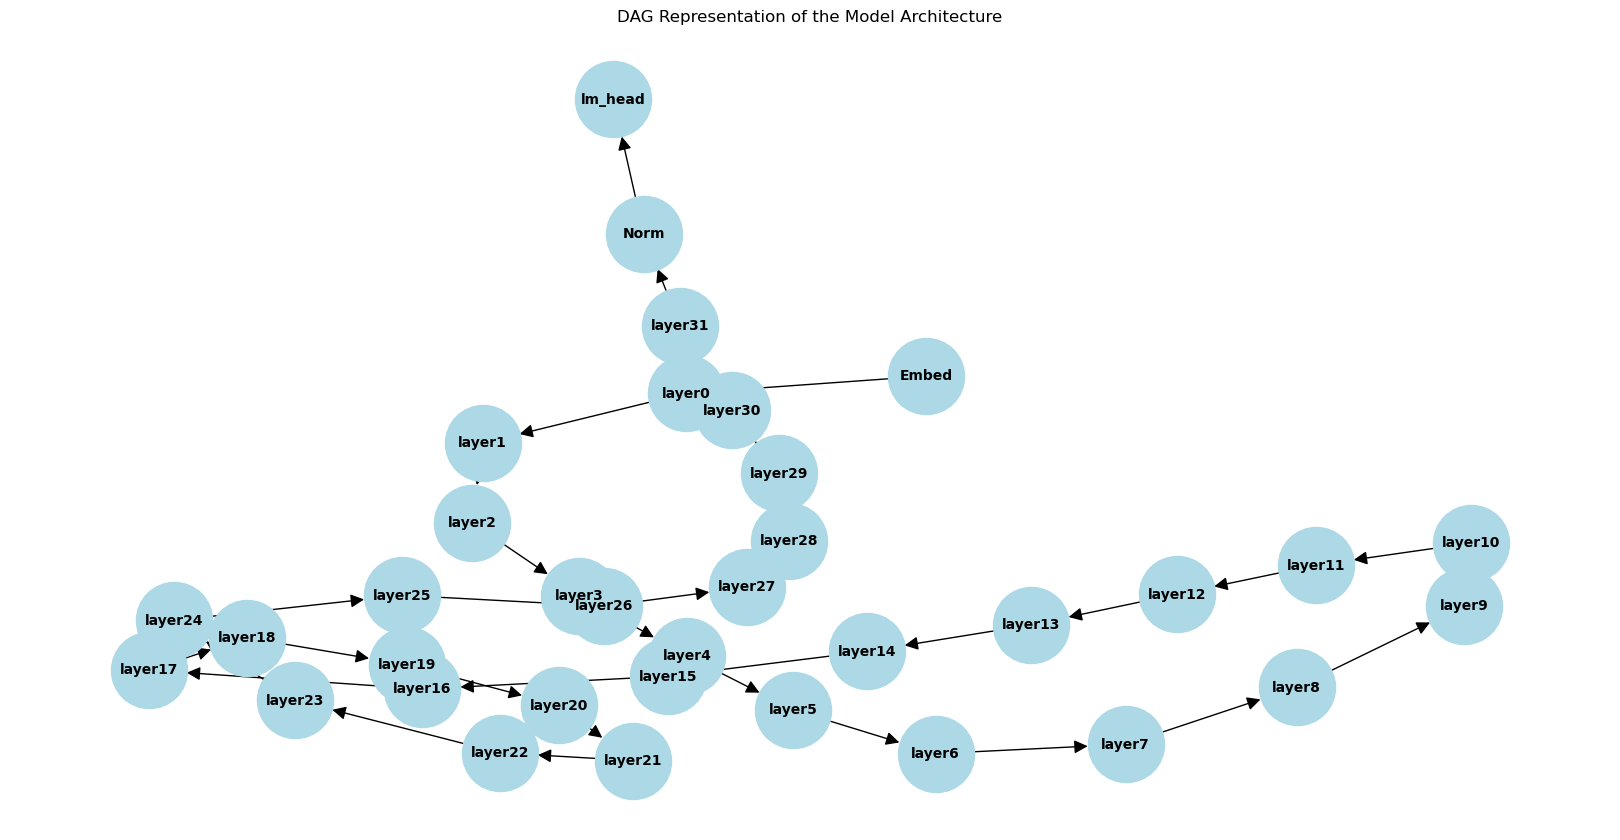

In [5]:
# DAG 그래프 그리기 함수
def draw_dag(dag):
    G = nx.DiGraph(dag)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(16, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
    plt.title("DAG Representation of the Model Architecture")
    plt.show()

# DAG 그래프 그리기
draw_dag(dag)